# Pypi/conda download statistics of napari plugins
This notebook visualizes download statistics of napari plugins downloaded from pypi and conda. It uses the APIs of the [napari hub](https://www.napari-hub.org/) and [pypistats](https://pypistats.org/) and [condastats](https://condastats.readthedocs.io/) (big thanks to the data providers!).

Before over-interpreting the presented data, please be aware of:
* the number of downloads is typically higher than the number of users,
* plugins that are dependencies of other plugins appear downloaded more often,
* plugins downloaded via conda and pypi may be counted differently,
* plugins that serve as python libraries also for other purposes may be overestimated in the napari-plugin context,
* plugins downloaded via automated test suites may be counted as well and
* [gamification](https://en.wikipedia.org/wiki/Gamification).

In [1]:
# conda install condastats 
# pip install pypistats

In [2]:
import pandas as pd
import urllib, json
import matplotlib.pyplot as plt
import time
import numpy as np

from condastats.cli import overall, pkg_platform, pkg_version, pkg_python, data_source
from pypistats import overall as overall_pypi

month = '2023-01'
start_date = '2023-01-01'
end_date = '2023-01-31'

In [3]:
# check which months exist on conda
p = pkg_python('devbio-napari', monthly=True)
p

pkg_name       time     pkg_python
devbio-napari  2022-04                 304
               2022-05                 391
               2022-06                 842
               2022-07                1994
               2022-08                 423
               2022-09                1583
               2022-10                 988
               2022-11                 665
               2022-12                 436
               2023-01                 271
Name: counts, dtype: int64

In [4]:
# check which months exist on conda
p = pkg_python('napari', monthly=True)
p

pkg_name  time     pkg_python
napari    2020-02                  39
          2020-03                 150
          2020-04                 235
          2020-05                 788
          2020-06                1012
          2020-07                 797
          2020-08                 499
          2020-09                 759
          2020-10                1346
          2020-11                 725
          2020-12                 535
          2021-01                 482
          2021-02                1036
          2021-03                2191
          2021-04                1830
          2021-05                1184
          2021-06                1528
          2021-07                1773
          2021-08                2442
          2021-09                1734
          2021-10                1746
          2021-11                1273
          2021-12                1260
          2022-01                1717
          2022-02                2201
          2022-03   

In [5]:
def get_all_plugin_data():
    url = 'https://api.napari-hub.org/plugins'

    json_url = urllib.request.urlopen(url) 
    data = json.loads(json_url.read()) 
    #print (data)
    return data

def get_plugin_index():
    data = get_all_plugin_data()
    return list(data.keys())

all_plugins = get_plugin_index()

df = pd.DataFrame({'plugin':all_plugins})

In [6]:
def add_condastats(df):
    conda_downloads = []
    for name in df['plugin']:
        name = name.lower()
        print(name)
        try:
            p = pkg_python(name, month=month)
            num_downloads = p[0]
        except:
            print("Error")
            num_downloads = np.nan
        conda_downloads.append(num_downloads)

    df['conda_downloads'] = conda_downloads

add_condastats(df)

image-composer
image-part-selecter
label-creator
layer-data-replace
offset-subtraction
partseg
partseg-smfish
partial-aligner
platymatch
redlionfish
world2data
affinder
arcos-gui
avidaq
bbii-decon
beetlesafari
bfio
Error
blik
brainglobe-napari-io
brainreg-napari
Error
brainreg-segment
btrack
cellfinder-napari
cellpose-napari
devbio-napari
disease-classifier
Error
elastix-napari
Error
empanada-napari
Error
faser
Error
grabber-ift
guanine-crystal-analysis
hesperos
iacs-ipac-reader
imaxt-multiscale-plugin
Error
koopa-viz
mikro-napari
Error
misic-napari
morphometrics
morphometrics-engine
Error
morphospaces
Error
napari-3d-ortho-viewer
napari-deepspot
napari-ids
Error
napari-ip-workflow
napari-ism
napari-j
napari-lf
Error
napari-philow
napari-picasso
napari-accelerated-pixel-and-object-classification
napari-affinities
Error
napari-aicsimageio
napari-aideveloper
Error
napari-allencell-annotator
napari-allencell-segmenter
napari-animated-gif-io
napari-animation
napari-annotate
Error
napari-an

In [7]:
df

,plugin,conda_downloads
0,Image-Composer,8.0
1,Image-Part-Selecter,8.0
2,Label-Creator,7.0
3,Layer-Data-Replace,10.0
4,Offset-Subtraction,11.0
5,PartSeg,208.0
6,PartSeg-smfish,22.0
7,Partial-Aligner,7.0
8,PlatyMatch,102.0
9,RedLionfish,249.0


In [8]:
def add_pypistats(df):
    pypi_downloads = []
    for name in df['plugin']:
        print(name)
        try:
            time.sleep(5)
            o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)
            without_mirrors = o[o['category']  == 'without_mirrors']
            num_downloads = without_mirrors['downloads'].sum()
        except:
            print("Error")
            num_downloads = np.nan
        pypi_downloads.append(num_downloads)

    df['pypi_downloads'] = pypi_downloads

add_pypistats(df)

Image-Composer
Image-Part-Selecter
Label-Creator
Layer-Data-Replace
Offset-Subtraction
PartSeg
PartSeg-smfish
Partial-Aligner
PlatyMatch
RedLionfish
World2Data
affinder
arcos-gui
avidaq
bbii-decon
beetlesafari
bfio
blik
brainglobe-napari-io
brainreg-napari
brainreg-segment
btrack
cellfinder-napari
cellpose-napari
devbio-napari
disease-classifier
elastix-napari
empanada-napari
faser
grabber-ift
guanine-crystal-analysis
hesperos
iacs-ipac-reader
imaxt-multiscale-plugin
koopa-viz
mikro-napari
misic-napari
morphometrics
morphometrics-engine
morphospaces
napari-3d-ortho-viewer
napari-DeepSpot
napari-IDS
napari-IP-workflow
napari-ISM
napari-J
napari-LF
napari-PHILOW
napari-PICASSO
napari-accelerated-pixel-and-object-classification
napari-affinities
napari-aicsimageio
napari-aideveloper
napari-allencell-annotator
napari-allencell-segmenter
napari-animated-gif-io
napari-animation
napari-annotate
napari-annotator
napari-annotatorj
napari-apple
napari-apr-viewer
napari-arboretum
napari-assistant

C:\Users\haase\AppData\Local\Temp\ipykernel_12232\2625326076.py:7: UserWarning: Requested start date (2023-01-01) is before earliest available data (2023-01-25), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-brightness-contrast
napari-brushsettings
napari-btrack-reader
napari-bud-cell-segmenter
napari-buds
napari-calibration
napari-ccp4map
napari-cellseg3d
napari-checkerboard
napari-cilia-beating-frequency
napari-clemreg
napari-clusters-plotter
napari-compressed-labels-io
napari-conidie
napari-console
napari-cookiecut
napari-crop
napari-cryofibsem-monitor
napari-cupy-image-processing
napari-curtain
napari-czann-segment
napari-czifile2
napari-data-preview
Error
napari-deepfinder
napari-deeplabcut
napari-deepmeta
napari-denoiseg
napari-dexp
napari-dv
napari-dvid
napari-dzi-zarr
napari-elementary-numpy-operations
napari-em-reader
napari-error-reporter
napari-feature-classifier
napari-features
napari-filament-annotator
napari-filaments
napari-file-watcher


C:\Users\haase\AppData\Local\Temp\ipykernel_12232\2625326076.py:7: UserWarning: Requested start date (2023-01-01) is before earliest available data (2023-01-16), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-folder-browser
napari-generic-SIMulator
napari-geojson
napari-gruvbox
napari-hdf5-labels-io
napari-help
napari-hierarchical
napari-image-stacker
napari-imaris-loader
napari-imc
napari-imsmicrolink
napari-input-visualizer
napari-itk-io
napari-kics
napari-label-interpolator
napari-labelimg4classification
napari-labeling
napari-labelling-assistant
napari-labels-overlap
napari-large-image-importer
Error
napari-lattice
napari-layer-details-display
napari-layer-table
napari-lazy-openslide
napari-live-flim
napari-live-recording
napari-locpix


C:\Users\haase\AppData\Local\Temp\ipykernel_12232\2625326076.py:7: UserWarning: Requested start date (2023-01-01) is before earliest available data (2023-01-16), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-macrokit


C:\Users\haase\AppData\Local\Temp\ipykernel_12232\2625326076.py:7: UserWarning: Requested start date (2023-01-01) is before earliest available data (2023-01-27), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-manual-transforms
napari-mat-file-reader
napari-mat-images
napari-math
napari-matplotlib
napari-medical-image-formats
napari-merge-stardist-masks
napari-metroid
napari-micromanager
napari-microscope
napari-mm3
napari-molecule-reader
napari-mouse-controls
napari-mrcfile-handler
napari-mrcfile-reader
napari-mri
napari-multitask
napari-n2v
napari-nD-annotator
napari-nasa-samples
napari-nd-cropper
napari-nd2-folder-viewer
napari-ndtiffs
napari-nibabel
Error
napari-nikon-nd2
napari-nlm
napari-nucleaizer
napari-omaas
napari-ome-zarr
napari-omero
napari-organoid-counter
napari-owncloud
napari-patchcreator
napari-pdf-reader
napari-pdr-reader
napari-pixel-correction
napari-plot
napari-plot-profile
napari-plugin-search
napari-pointslayer-projection
Error
napari-power-spectrum
napari-power-widgets
napari-pram
napari-process-points-and-surfaces
napari-proofread-brainbow
napari-properties-plotter
napari-properties-viewer
napari-psf-analysis
napari-psf-simulator
napari-pssr
napari-pyclesperan

C:\Users\haase\AppData\Local\Temp\ipykernel_12232\2625326076.py:7: UserWarning: Requested start date (2023-01-01) is before earliest available data (2023-01-27), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-rioxarray
napari-roi
napari-roi-registration
napari-sairyscan
napari-sc3D-viewer
napari-script-editor
napari-sdeconv
napari-segment
napari-segment-blobs-and-things-with-membranes
napari-serialcellpose
napari-sif-reader
napari-sift-registration
napari-sim-processor
napari-simpleitk-image-processing
napari-skimage-regionprops
napari-solarized


C:\Users\haase\AppData\Local\Temp\ipykernel_12232\2625326076.py:7: UserWarning: Requested start date (2023-01-01) is before earliest available data (2023-01-23), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-spacetx-explorer
napari-spatial-omics
napari-spatialdata
napari-splinedist
napari-splineit
napari-spreadsheet
napari-stable-diffusion
napari-steinpose
napari-stl-exporter
napari-stracking
napari-stress
napari-subboxer
napari-svetlana
napari-svg
napari-tabu
napari-text-layer
napari-tiler
napari-time-series-plotter
napari-time-slicer
napari-timeseries-opener-plugin
napari-tissuumaps
napari-tomoslice
napari-tracks-reader
napari-trait2d
napari-turing
napari-tyssue
napari-umap
napari-unicell
napari-validate-random-label-predictions
napari-vesicles-segmentation
napari-video-cvdask
napari-vodex


C:\Users\haase\AppData\Local\Temp\ipykernel_12232\2625326076.py:7: UserWarning: Requested start date (2023-01-01) is before earliest available data (2023-01-04), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-workflow-inspector
napari-workflow-optimizer
napari-wsi
Error
napari-wsireg
napari-yapic-prediction
napari-yolov5
napari-zelda
napari_video
natari
nfinder
okapi-em
palmari
platelet-unet-watershed
psfmodels
pycudadecon
recOrder-napari
skan
skeleton-finder
smo
snouty-viewer
stardist-napari
the-segmentation-game
vessel-express-napari
vollseg-napari
vollseg-napari-mtrack
vollseg-napari-trackmate
waver
workshop-demo
yt-napari
zarpaint


In [9]:
# df

In [10]:
df.to_csv("stats_" + month + ".csv")

In [11]:
def remove_nans_and_shipped_with_napari_plugins(df):
    # remove plugins that are part of the napari distribution
    remove_plugins = ["napari-console", "napari-svg"]
    df = df[[x not in remove_plugins for x in df['plugin']]]

    # remove nans
    df = df.dropna()
    
    return df

df = remove_nans_and_shipped_with_napari_plugins(df)

In [12]:
df = df.sort_values('conda_downloads', ascending=False)

In [13]:
df

,plugin,conda_downloads,pypi_downloads
263,skan,533.0,1470.0
24,devbio-napari,271.0,71.0
9,RedLionfish,249.0,85.0
49,napari-accelerated-pixel-and-object-classifica...,224.0,557.0
63,napari-assistant,210.0,555.0
5,PartSeg,208.0,665.0
207,napari-segment-blobs-and-things-with-membranes,204.0,347.0
233,napari-time-slicer,202.0,843.0
212,napari-simpleitk-image-processing,167.0,287.0
200,napari-roi,152.0,106.0


In [14]:
# reindex to make the plotting work
df = pd.DataFrame(df.to_dict(orient='list'))

## condastats

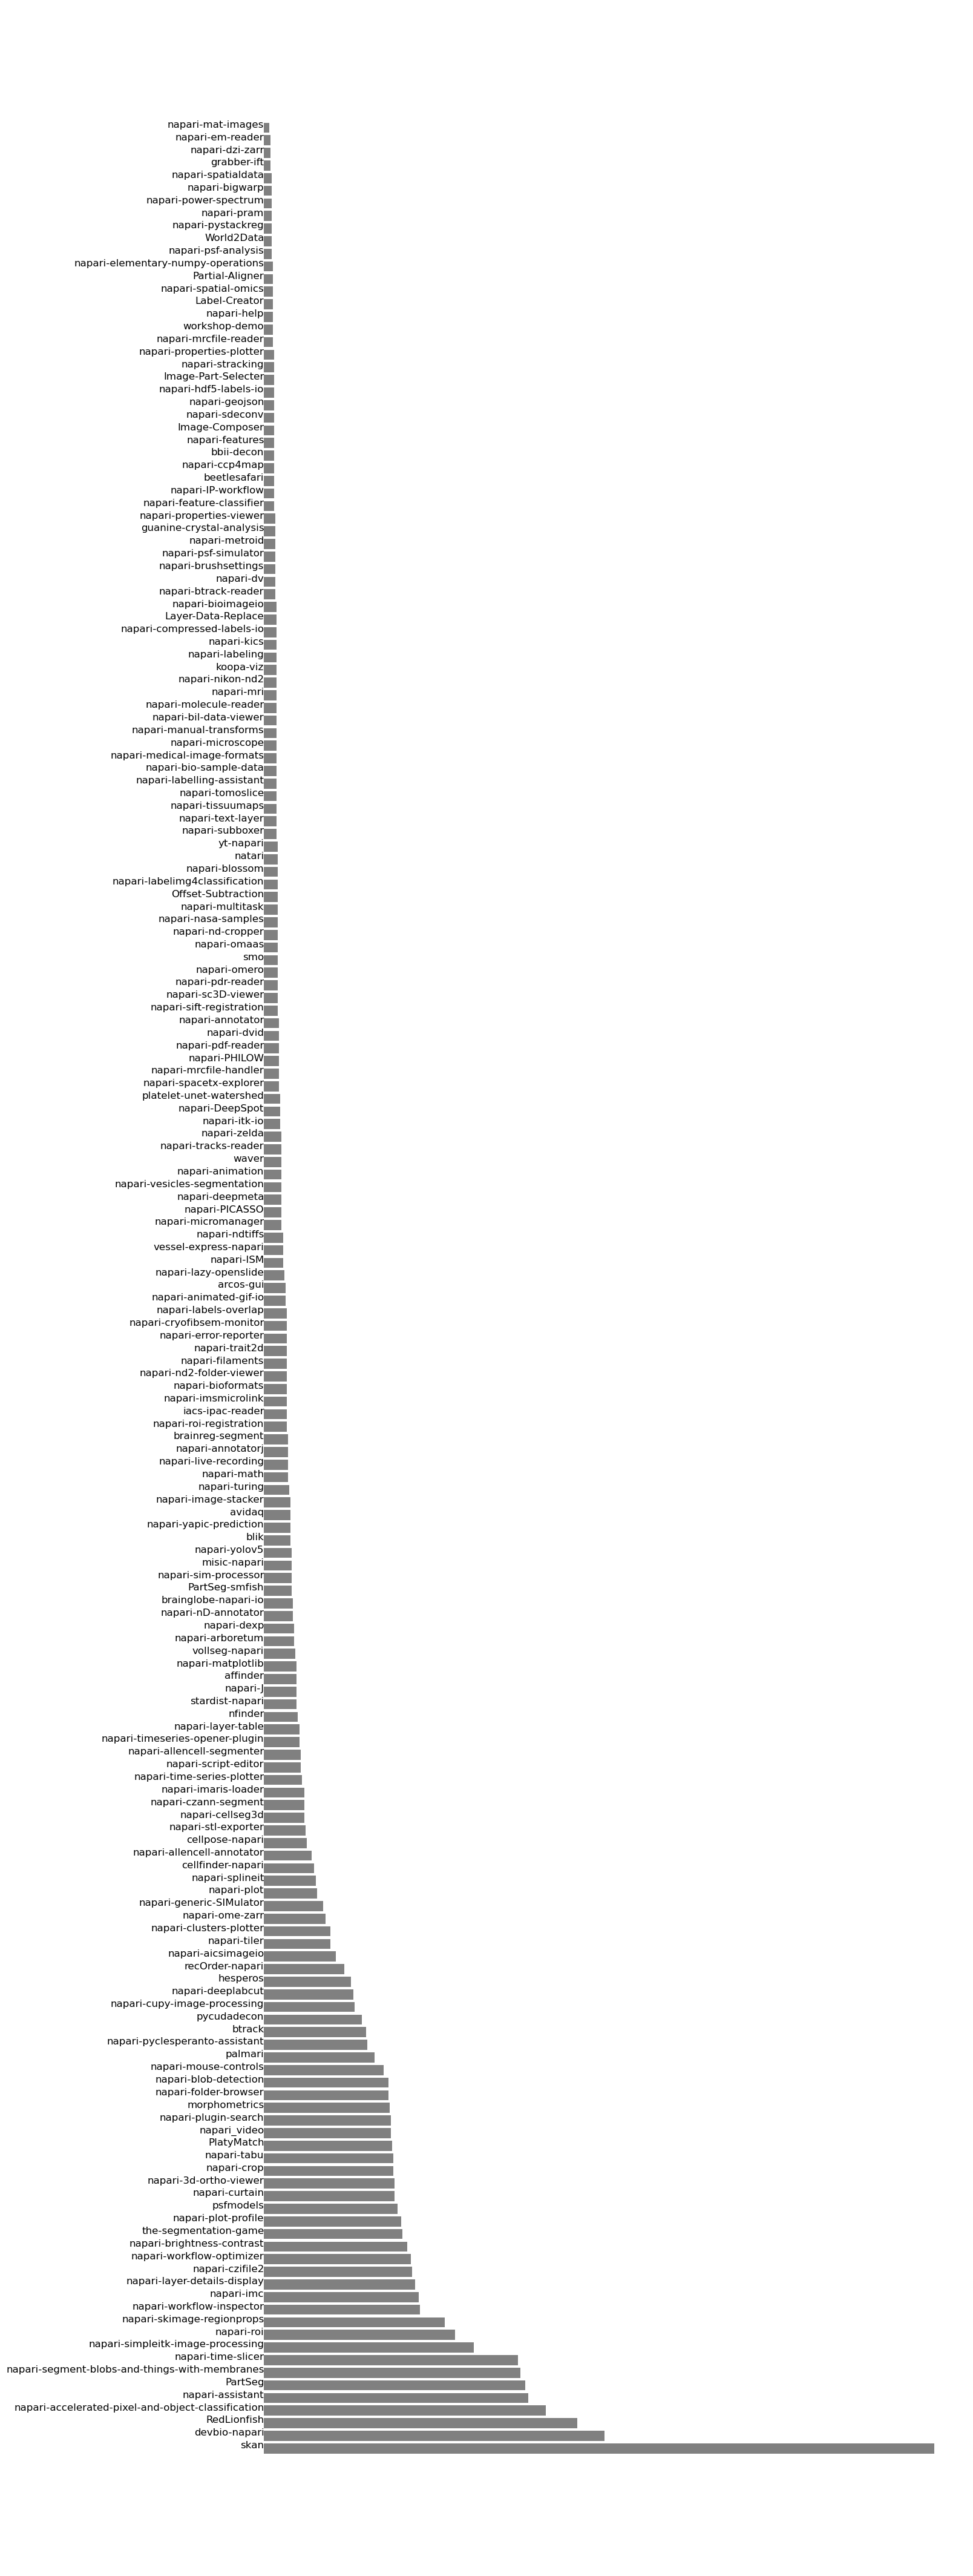

In [15]:
def plot_data(df, column='conda_downloads', width=15,height=55):
    f, ax = plt.subplots(1,1,figsize=(width,height))
    # ax = plt.subplot(111, fig_size=(15, 15))
    #df[column].plot(ax=ax, kind='barh', title='ranking')
    ax.axis('off')
    for i, x in enumerate(df['plugin']):
        plt.barh(i, df[column][i], color = 'grey')
        ax.text(0, i, x, ha='right', fontsize='large')
        
plot_data(df)

## condastats vs. pypistats

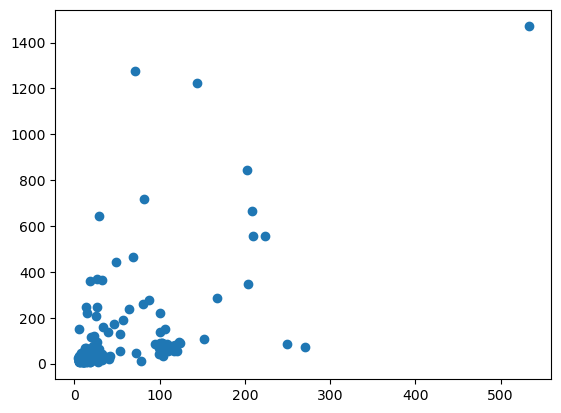

In [16]:
plt.scatter(df['conda_downloads'], df['pypi_downloads'])

## pypistats

In [17]:
# reload the data because we removed entries with NaNs in the pypi column earlier
df = pd.read_csv("stats_" + month + ".csv")
df = df[["plugin", "pypi_downloads"]]

df = remove_nans_and_shipped_with_napari_plugins(df)

In [18]:
df = df.sort_values('pypi_downloads', ascending=False)
df

,plugin,pypi_downloads
263,skan,1470.0
100,napari-deeplabcut,1275.0
213,napari-skimage-regionprops,1222.0
233,napari-time-slicer,843.0
272,vollseg-napari-trackmate,782.0
193,napari-pyclesperanto-assistant,718.0
5,PartSeg,665.0
54,napari-allencell-segmenter,643.0
271,vollseg-napari-mtrack,598.0
49,napari-accelerated-pixel-and-object-classifica...,557.0


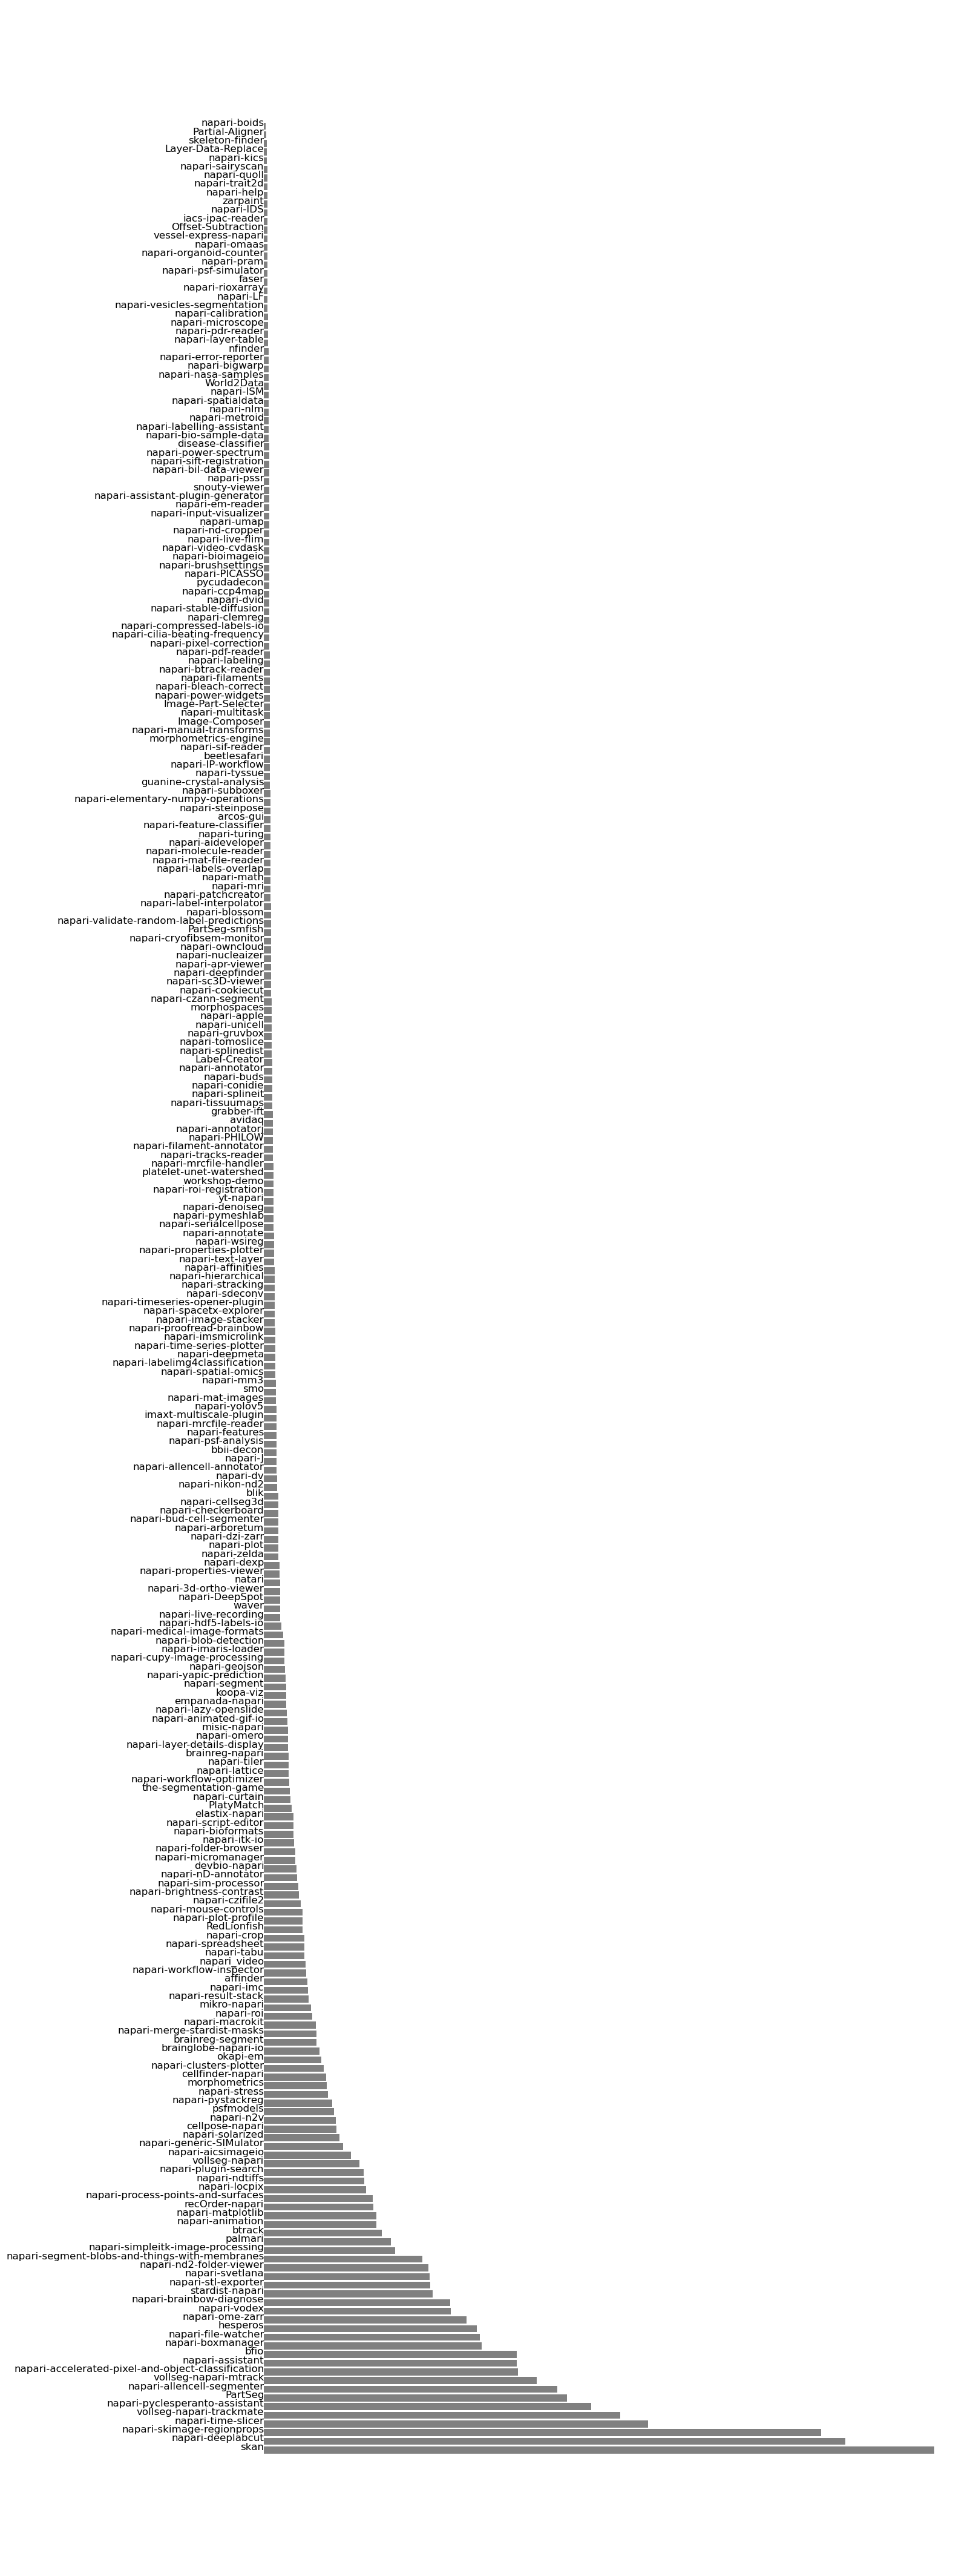

In [19]:
# reindex to make the plotting work
df = pd.DataFrame(df.to_dict(orient='list'))

plot_data(df, column='pypi_downloads')